0.5
x0+x1+x2+x3+x4+x5+x6
0.49999999949999996
[0.0, 1.0, 2.0, 0.0, 1.0, 0.0, 0.0]
1.5


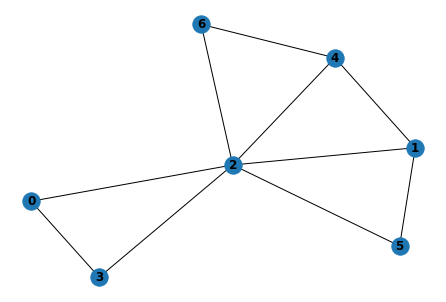

In [4]:
def breakProcess(graph,theta,beta):
    # 获取点集 点的数量
    nodeList = list(graph.nodes)
    nodeNum = len(list(graph.nodes))
    # 负载矩阵以及容量矩阵
    load_matrix = np.zeros((1,n))
    cap_matrix = np.zeros((1,n))
    # 从边集合中取出十分之一的点，依次断裂
    selectNumber = int(nodeNum)
    selectNodeList = random.sample(nodeList, selectNumber)
    T = 0
    # 赋值负载矩阵以及容量矩阵
    for item in nodeList:
        load=graph.degree(item)**beta  #beta
        cap = round(load*T,3)
        load_matrix[0][item]=load
        cap_matrix[0][item]=cap
    for iteml in selectNodeList:
        neighborSum = 0
        PointList = list(graph.neighbors(iteml))       
        if(iteml in PointList):
            PointList.remove(iteml)
        # for litem in PointList:
            # neighborSum = neighborSum + ((graph.degree(litem))**theta)   
        neighborSum = (graph.degree(iteml))   
        Tmax = 0
        Ttemp = load_matrix[0][iteml] 
        for litem in PointList:
            Ttemp = (load_matrix[0][iteml])/(neighborSum*load_matrix[0][litem])
            if(Ttemp>Tmax):
                Tmax = Ttemp
        if(T <Tmax):
            T = Tmax
    return T+1




########################################################################
# 级联故障两种/三种策略的理论曲线
# 2020-11-23 20:00
# BDBDSBD
########################################################################
import sys
# sys.setrecursionlimit(40000)  # 如果递归出现爆栈问题，就用这句话
import networkx as network
import matplotlib.pyplot as plot
import math
import numpy as np
import random
import copy
from scipy.optimize import minimize
import numpy as np
from pyscipopt import Model
########################################################################
# 构造网络，节点数为n，度为2*2，制作网络结构的浅拷贝
start = -0.5
end = 1.5
Xlist =  np.linspace(start,end,40)
Ymatrix = np.zeros((6,len(Xlist)))
ttTime = 1
for tt in range(ttTime):
    n = 7
    addEdge = 4
    beta = 1
    theta = 0
    # networkName = 'BA'
    # if(networkName == 'BA'):
    #     networkChoose = network.barabasi_albert_graph(n,5)
    # if(networkName == 'WS'):        
    #     networkChoose = network.watts_strogatz_graph(n,12,0.1)
    # if(networkName == 'ER'):  
    #     networkChoose = network.erdos_renyi_graph(n, 12/n)
    networkChoose = network.Graph() 
    networkChoose.add_nodes_from([0,1,2, 3,4,5,6])
    networkChoose.add_edge(0,2)
    networkChoose.add_edge(0,3)
    networkChoose.add_edge(2,3)
    networkChoose.add_edge(2,5)
    networkChoose.add_edge(2,1)
    networkChoose.add_edge(2,4)
    networkChoose.add_edge(2,6)
    networkChoose.add_edge(1,5)
    networkChoose.add_edge(1,4)
    networkChoose.add_edge(6,4)

    inittup = ()
    tup = ()
    tupK = ()
    tupM = ()
    for i in range(n):
        inittup = inittup + (0,)
        tup = tup + (networkChoose.degree(i),)
        tupK = tupK + (networkChoose.degree(i)**beta,)
        PointList = list(networkChoose.neighbors(i))
        if(PointList == []):
            continue
        PointList = list(set(PointList))
        if(i in PointList):
            PointList.remove(i)
        maxNeighborDegree = 1000
        for litem in PointList:
            if(maxNeighborDegree>networkChoose.degree(litem)):
                maxNeighborDegree=networkChoose.degree(litem)
        tupM = tupM + (maxNeighborDegree**beta,)
#     print(tup)
#     print(tupK)
#     print(tupM)
LLL = []
for i in range(n):
    LLL.append(tupK[i]/(tupM[i]*(tup[i])))
print(max(LLL))

Listadd = []
md = Model()
names = locals()
stringN = ''
for i in range(n):
    names['x' + str(i) ] = md.addVar('x', lb=0, vtype='I')
    stringN = stringN + 'x'+str(i)+'+'
print(stringN[:-1])
z = md.addVar('z')
md.setObjective(z, sense='minimize')
# for i in range(n):
#     md.addCons(2*x + y <= 8)
for i in range(n):
    md.addCons(tupK[i]/(tupM[i]*(tup[i]+ names['x' + str(i) ]))<=z)
md.addCons(x0+x1+x2+x3+x4+x5+x6<=addEdge)
md.optimize()
sol = md.getBestSol()
for i in range(n):
    Listadd.append(sol[names['x' + str(i) ]])
# print(Listadd)
print(sol[z])
print(Listadd)
network.draw(networkChoose, with_labels=True, font_weight='bold')

flagCircle = 0
# for beta in Xlist:
theta = 0
flagCircle = flagCircle%(len(Xlist))
networkChooseCopy = networkChoose.copy()
flag = copy.copy(flagCircle)
networkChooseCopy = networkChoose.copy()
Ymatrix[0][flag]=Ymatrix[0][flag] +  breakProcess(networkChooseCopy,theta,beta)
print(breakProcess(networkChooseCopy,theta,beta))
    # print(beta,'beta')
flagCircle = flagCircle + 1

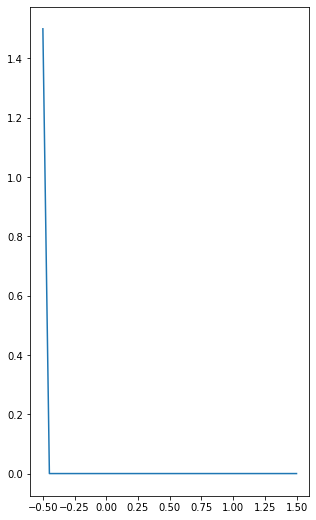

In [5]:
plot.figure(figsize=(5,9))
plot.plot(Xlist,Ymatrix[0,:]/ttTime,label='INIT')